In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir(r"C:\Users\e870859\Desktop\Data Science\7. Deep Learning Compititions\Tutorial -16"))

['.ipynb_checkpoints', 'cell_images', 'Model - 2.ipynb', 'Model -1-Copy1.ipynb', 'Model -1.ipynb', 'Parasitized', 'results (2)', 'Uninfected']


In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.
c:\users\e870859\anaconda3\envs\[virtual_env]\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\e870859\anaconda3\envs\[virtual_env]\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\e870859\anaconda3\envs\[virtual_env]\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\e870859\

In [3]:
parasitized_data = os.listdir(r'C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -16/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir(r'C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -16/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


## DATA VISUALIZATION

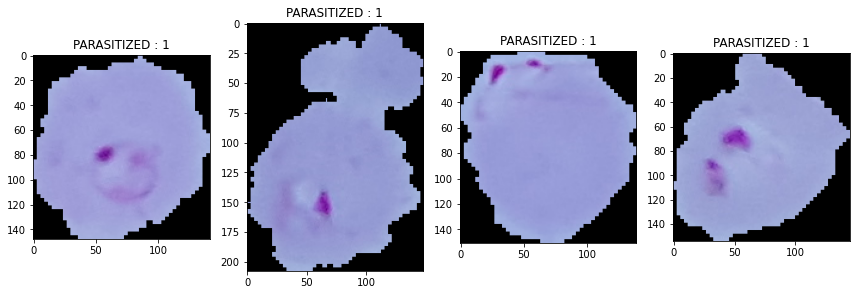

In [4]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -16/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

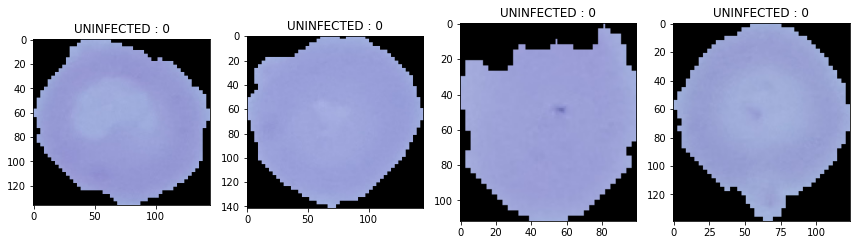

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -16/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [6]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -16/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -16/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

## Reading Image from List of list

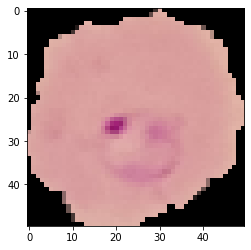

In [7]:
plt.imshow(data[0])
plt.show()

In [ ]:
data

In [10]:
image_data = np.array(data)
labels = np.array(labels)

In [ ]:
image_data

In [12]:
image_data.shape

(27558, 50, 50, 3)

In [13]:
labels.shape

(27558,)

## Arranging into array

In [13]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [14]:
labels.shape

(27558,)

In [15]:
idx

array([26519,  4588, 12860, ...,  8701, 22301, 17128])

In [14]:
image_data.shape

(27558, 50, 50, 3)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [18]:
x_train.shape

(22046, 50, 50, 3)

In [19]:
y_train.shape

(22046,)

In [20]:
y_test.shape

(5512,)

In [22]:
num_classes = len(np.unique(y_train))
num_classes

2

In [24]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [27]:
print("X train shape: ",x_train.shape)
print("X test shape: ",x_test.shape)
print("X train shape: ",y_train.shape)
print("X test shape: ",y_test.shape)

X train shape:  (22046, 50, 50, 3)
X test shape:  (5512, 50, 50, 3)
X train shape:  (22046, 2)
X test shape:  (5512, 2)


In [29]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [30]:
model = Sequential()

In [31]:
x_train.shape[0:]

(22046, 50, 50, 3)

In [32]:
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(50,50,3)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

Instructions for updating:
Colocations handled automatically by placer.


In [33]:
model.add(Flatten())

In [42]:
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2,activation='softmax'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

c:\users\e870859\anaconda3\envs\[virtual_env]\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [44]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [45]:
data_gen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

In [46]:
data_gen.fit(x_train)

In [47]:
batch_size=128

history = model.fit_generator(data_gen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=5, verbose=2)

Epoch 1/5
 - 51s - loss: 0.6527 - acc: 0.5977
Epoch 2/5
 - 70s - loss: 0.3688 - acc: 0.8692
Epoch 3/5
 - 57s - loss: 0.2750 - acc: 0.9129
Epoch 4/5
 - 52s - loss: 0.2042 - acc: 0.9341
Epoch 5/5
 - 54s - loss: 0.1742 - acc: 0.9471


In [48]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1]*100)
print('\n', 'Total test Loss:', score[0]*100)


 Test accuracy: 95.48258345428157

 Total test Loss: 14.447137387942508


In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

5512/5512 [==============================] - 6s 1ms/step
0.14447137387942507
0.9548258345428157


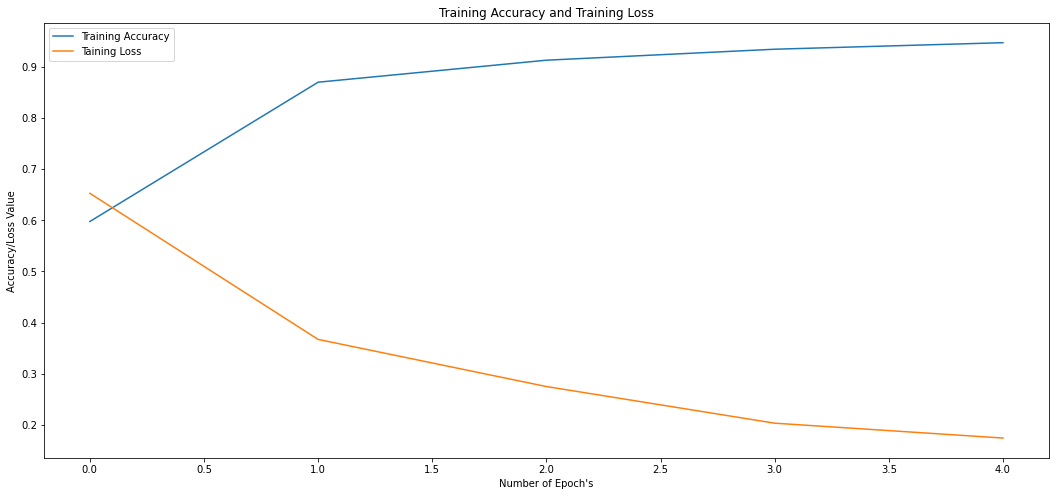

In [53]:
plt.figure(figsize = (18,8))
plt.plot(range(5), history.history['acc'], label = 'Training Accuracy')
plt.plot(range(5), history.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
